<a href="https://www.kaggle.com/code/heshamibrahem/crime?scriptVersionId=115764092" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-data-set/Crime_Data.csv


In [2]:
df = pd.read_csv("../input/crime-data-set/Crime_Data.csv") # read the csv file
df.head(10) # show the top 10 rows

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,20080000465209,12/13/1908,2114.0,12/13/2008,2114.0,DUI,DUI-LIQUOR,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
1,20100000202011,06/15/1964,0.0,06/15/2010,1031.0,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,WEST,Q,Q2,QUEEN ANNE
2,2012000023437,01/01/1973,0.0,01/25/2012,1048.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NORTH,N,N2,NORTHGATE
3,20130000327785,06/01/1974,0.0,09/09/2013,1117.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
4,20160000289384,01/01/1975,0.0,08/11/2016,1054.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
5,1975000079415,12/16/1975,900.0,12/16/1975,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
6,1976000069169,01/01/1976,1.0,01/31/1976,2359.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,NaN,NaN,UNKNOWN
7,20170000474905,07/01/1976,800.0,12/27/2017,1519.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,NaN,NaN,UNKNOWN
8,20180000183590,01/01/1977,0.0,05/22/2018,1328.0,RAPE,SEXOFF-SODOMY,UNKNOWN,NaN,NaN,UNKNOWN
9,20090000300201,01/01/1978,1.0,08/25/2009,1016.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,SOUTHWEST,W,W1,ALKI


In [3]:
def infoo(df):
    df.info() # getting data frame information
    print("-" * 50)
    print(f"number of rows: {df.shape[0]}") # dataframe rows number
    print("-" * 50)
    print(f"number of columns: {df.shape[1]}") # dataframe columns number
    print("-" * 50)
    for c in df.columns:
        if df[c].dtype == 'float' or df[c].dtype == 'int': # if numerical values
            print("the values of {} are within range {} to {}".format(c,df[c].min(),df[c].max())) # get range
            print("-" * 50)
        else: # string or categorial values
            print("Number of Unique value of {} is: {}".format(c, len(df[c].unique()))) # get number of unqiue value
            print("Unique value of {} is: {}".format(c, df[c].unique())) # get unique values
            print("-" * 50)
    for c in df.columns:
        print("Nan number in {} is: {}".format(c, df[c].isna().sum())) # collect nan values
        print("-" * 50)

In [4]:
infoo(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481376 entries, 0 to 481375
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Report Number                481376 non-null  int64  
 1   Occurred Date                481374 non-null  object 
 2   Occurred Time                481374 non-null  float64
 3   Reported Date                481376 non-null  object 
 4   Reported Time                481374 non-null  float64
 5   Crime Subcategory            481114 non-null  object 
 6   Primary Offense Description  481376 non-null  object 
 7   Precinct                     481370 non-null  object 
 8   Sector                       478367 non-null  object 
 9   Beat                         478414 non-null  object 
 10  Neighborhood                 481376 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 40.4+ MB
--------------------------------------------------
number o

> **See if the occur and report happened in the same day**

In [5]:
df[df['Occurred Date'] != df['Reported Date']]

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,20080000465209,12/13/1908,2114.0,12/13/2008,2114.0,DUI,DUI-LIQUOR,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
1,20100000202011,06/15/1964,0.0,06/15/2010,1031.0,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,WEST,Q,Q2,QUEEN ANNE
2,2012000023437,01/01/1973,0.0,01/25/2012,1048.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NORTH,N,N2,NORTHGATE
3,20130000327785,06/01/1974,0.0,09/09/2013,1117.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
4,20160000289384,01/01/1975,0.0,08/11/2016,1054.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...
481302,20180000240335,06/30/2018,800.0,07/01/2018,1308.0,BURGLARY-RESIDENTIAL,BURGLARY-NOFORCE-RES,NORTH,B,B1,BALLARD SOUTH
481305,20180000239770,06/30/2018,730.0,07/01/2018,152.0,BURGLARY-COMMERCIAL,BURGLARY-NOFORCE-NONRES,NORTH,U,U3,ROOSEVELT/RAVENNA
481328,20180000240262,06/30/2018,0.0,07/01/2018,1253.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,NORTH,N,N1,BITTERLAKE
481374,20070000430946,NaN,NaN,01/01/2007,NaN,RAPE,RAPE-OTHER,UNKNOWN,NaN,NaN,UNKNOWN


> **Some difference doesn't make sence like a crime happened in 1908 then reported in 2008 then we need to see the difference for all crime**

In [6]:
df['Occurred Date'] = pd.to_datetime(df['Occurred Date']) # change from object to datetime
df['Reported Date'] = pd.to_datetime(df['Reported Date']) # change from object to datetime
df['time difference'] = df['Reported Date'] - df['Occurred Date'] # calculating the time difference
df.head(10)

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,time difference
0,20080000465209,1908-12-13,2114.0,2008-12-13,2114.0,DUI,DUI-LIQUOR,EAST,G,G2,CENTRAL AREA/SQUIRE PARK,36525 days
1,20100000202011,1964-06-15,0.0,2010-06-15,1031.0,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,WEST,Q,Q2,QUEEN ANNE,16801 days
2,2012000023437,1973-01-01,0.0,2012-01-25,1048.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NORTH,N,N2,NORTHGATE,14268 days
3,20130000327785,1974-06-01,0.0,2013-09-09,1117.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN,14345 days
4,20160000289384,1975-01-01,0.0,2016-08-11,1054.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN,15198 days
5,1975000079415,1975-12-16,900.0,1975-12-16,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK,0 days
6,1976000069169,1976-01-01,1.0,1976-01-31,2359.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,NaN,NaN,UNKNOWN,30 days
7,20170000474905,1976-07-01,800.0,2017-12-27,1519.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,NaN,NaN,UNKNOWN,15154 days
8,20180000183590,1977-01-01,0.0,2018-05-22,1328.0,RAPE,SEXOFF-SODOMY,UNKNOWN,NaN,NaN,UNKNOWN,15116 days
9,20090000300201,1978-01-01,1.0,2009-08-25,1016.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,SOUTHWEST,W,W1,ALKI,11559 days


In [7]:
df_new = df[df['time difference'].dt.days <= 365].reset_index() # filter under 1 year difference between report and occur
df_new.head(10)

,index,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,time difference
0,5,1975000079415,1975-12-16,900.0,1975-12-16,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK,0 days
1,6,1976000069169,1976-01-01,1.0,1976-01-31,2359.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,NaN,NaN,UNKNOWN,30 days
2,10,1979000049118,1979-01-28,1600.0,1979-02-09,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK,12 days
3,14,1981000076456,1981-02-14,2000.0,1981-02-15,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS,1 days
4,15,19810000305573,1981-08-22,2029.0,1981-08-22,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP,0 days
5,20,19880000507482,1988-09-29,155.0,1988-09-29,155.0,MOTOR VEHICLE THEFT,VEH-THEFT-AUTO,WEST,M,M2,SLU/CASCADE,0 days
6,30,19930000465323,1993-10-08,2213.0,1993-10-08,2213.0,HOMICIDE,HOMICIDE-PREMEDITATED-GUN,SOUTH,R,R2,CLAREMONT/RAINIER VISTA,0 days
7,32,19940000264046,1994-06-08,0.0,1994-06-12,844.0,THEFT-ALL OTHER,THEFT-OTH,SOUTHWEST,F,F1,HIGH POINT,4 days
8,42,19960000543964,1996-12-08,1130.0,1996-12-08,1700.0,CAR PROWL,THEFT-CARPROWL,SOUTH,O,O1,SODO,0 days
9,101,20000000216737,2000-05-12,2330.0,2000-05-14,1055.0,CAR PROWL,THEFT-CARPROWL,WEST,Q,Q3,SLU/CASCADE,2 days


> **Deleting uneccesary columns**

In [8]:
df_new.drop(["index","Report Number","Primary Offense Description","Crime Subcategory","Neighborhood"], axis = 1, inplace = True)

In [9]:
df_new.head(10)

,Occurred Date,Occurred Time,Reported Date,Reported Time,Precinct,Sector,Beat,time difference
0,1975-12-16,900.0,1975-12-16,1500.0,SOUTH,R,R3,0 days
1,1976-01-01,1.0,1976-01-31,2359.0,UNKNOWN,NaN,NaN,30 days
2,1979-01-28,1600.0,1979-02-09,1430.0,EAST,G,G2,12 days
3,1981-02-14,2000.0,1981-02-15,435.0,SOUTHWEST,W,W3,1 days
4,1981-08-22,2029.0,1981-08-22,2030.0,SOUTH,S,S2,0 days
5,1988-09-29,155.0,1988-09-29,155.0,WEST,M,M2,0 days
6,1993-10-08,2213.0,1993-10-08,2213.0,SOUTH,R,R2,0 days
7,1994-06-08,0.0,1994-06-12,844.0,SOUTHWEST,F,F1,4 days
8,1996-12-08,1130.0,1996-12-08,1700.0,SOUTH,O,O1,0 days
9,2000-05-12,2330.0,2000-05-14,1055.0,WEST,Q,Q3,2 days


In [10]:
df_new.dropna(inplace = True) # remove nan values

In [11]:
df_new[df_new.duplicated()] # see duplicated rows

,Occurred Date,Occurred Time,Reported Date,Reported Time,Precinct,Sector,Beat,time difference
70,2007-03-26,0.0,2007-04-05,1055.0,SOUTHWEST,F,F2,10 days
210,2007-10-29,1600.0,2007-10-29,1600.0,WEST,Q,Q1,0 days
1360,2008-01-08,1419.0,2008-01-08,1419.0,WEST,K,K3,0 days
1674,2008-01-11,2100.0,2008-01-12,1600.0,EAST,G,G3,1 days
1840,2008-01-12,1430.0,2008-01-12,1454.0,NORTH,L,L2,0 days
...,...,...,...,...,...,...,...,...
473556,2018-05-18,2300.0,2018-05-18,2300.0,WEST,D,D1,0 days
473557,2018-05-18,2300.0,2018-05-18,2300.0,WEST,D,D1,0 days
474215,2018-05-22,856.0,2018-05-22,856.0,WEST,Q,Q2,0 days
477744,2018-06-16,1530.0,2018-06-18,702.0,SOUTH,O,O1,2 days


In [12]:
df_new.drop_duplicates(inplace = True) # remove duplicated rows

In [13]:
df_new[df_new.duplicated()]

,Occurred Date,Occurred Time,Reported Date,Reported Time,Precinct,Sector,Beat,time difference


In [14]:
infoo(df_new)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476486 entries, 0 to 479693
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   Occurred Date    476486 non-null  datetime64[ns] 
 1   Occurred Time    476486 non-null  float64        
 2   Reported Date    476486 non-null  datetime64[ns] 
 3   Reported Time    476486 non-null  float64        
 4   Precinct         476486 non-null  object         
 5   Sector           476486 non-null  object         
 6   Beat             476486 non-null  object         
 7   time difference  476486 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), object(3), timedelta64[ns](1)
memory usage: 32.7+ MB
--------------------------------------------------
number of rows: 476486
--------------------------------------------------
number of columns: 8
--------------------------------------------------
Number of Unique value of Occurred Date is: 4033
Un

> **what's the number of crime occured over years?**

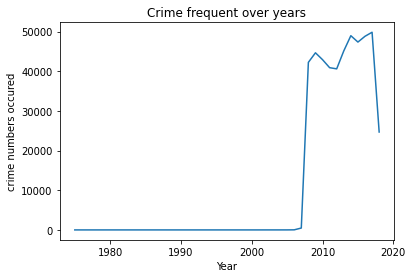

In [15]:
import matplotlib.pyplot as plt
occ_year = pd.DatetimeIndex(df_new['Occurred Date']).year
x = occ_year.value_counts().sort_index(ascending=True).index
y = list(occ_year.value_counts().sort_index(ascending=True))
plt.plot(x, y)
plt.title("Crime frequent over years")
plt.xlabel("Year")
plt.ylabel("crime numbers occured")
plt.show()

> **what's the number of crime reported over years?** the answer is the same as occured

> **Which precinct has the highest number of crime?**

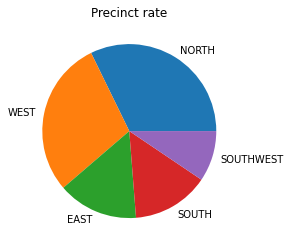

In [16]:
s = df_new.Precinct.value_counts()
y = list(s)
mylabels = s.index
plt.pie(y, labels = mylabels)
plt.title("Precinct rate")
plt.show()

> **North and west are top 2 in crimes**

> **Which Sector has the highest number of crime?**

first we need to know if there's 2 or more precinct has the same sectore name

In [17]:
uni_prec = df_new.Precinct.unique() # get the 5 precinct in a list
found = False
dic = {}
for p in uni_prec:
    s = df_new[df_new['Precinct'] == p] # filter
    dic[p] = s.Sector.unique() # add sector of the precinct in dict
for p in uni_prec:
    for s in dic[p]:
        for pp in uni_prec:
            if s in dic[pp] and p != pp:
                print("{} is a sector in {} and {}".format(s,p,pp))
                found = True
if not found:
    print("Every precinct has it's special sector names")

Every precinct has it's special sector names


> **Every precinct has it's special sector names**

Now time to see the highest sector that has crime

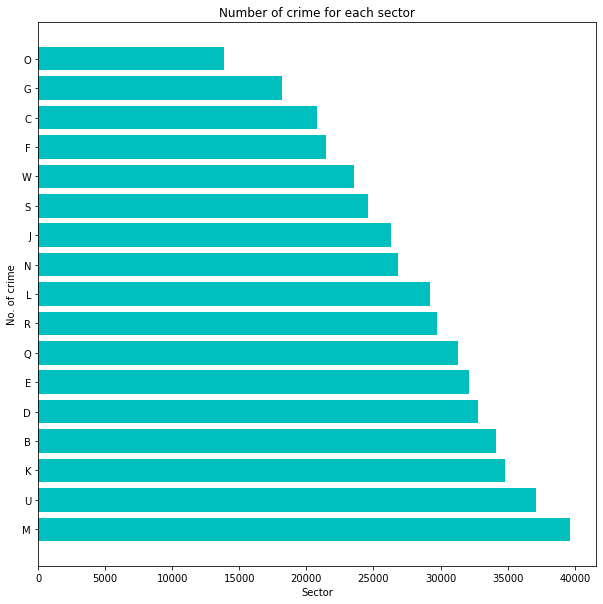

In [18]:
sec = df_new.Sector.value_counts()
y = list(sec)
x = sec.index
 
fig = plt.figure(figsize=(10, 10))
 
# creating the bar plot
plt.barh(x, y, color='c')
 
plt.xlabel("Sector")
plt.ylabel("No. of crime")
plt.title("Number of crime for each sector")
plt.show()

In [19]:
p = []
for i in x:
    p.append(df_new[df_new.Sector == i].Precinct.iloc[0])
print(list(x))
print(p)

['M', 'U', 'K', 'B', 'D', 'E', 'Q', 'R', 'L', 'N', 'J', 'S', 'W', 'F', 'C', 'G', 'O']
['WEST', 'NORTH', 'WEST', 'NORTH', 'WEST', 'EAST', 'WEST', 'SOUTH', 'NORTH', 'NORTH', 'NORTH', 'SOUTH', 'SOUTHWEST', 'SOUTHWEST', 'EAST', 'EAST', 'SOUTH']


> ****M is the highest sector in number of crimes****

> **top 5 sectors are in West and north that make these two Precinct are the top 2 Precinct for number of crimes**

Now time to see the highest Beat that has crime

In [20]:
df_new['beat_number'] = df_new['Beat'].str[1] # spliting the column into 2 columns
df_new.drop('Beat',axis=1, inplace= True)
df_new.head()

,Occurred Date,Occurred Time,Reported Date,Reported Time,Precinct,Sector,time difference,beat_number
0,1975-12-16,900.0,1975-12-16,1500.0,SOUTH,R,0 days,3
2,1979-01-28,1600.0,1979-02-09,1430.0,EAST,G,12 days,2
3,1981-02-14,2000.0,1981-02-15,435.0,SOUTHWEST,W,1 days,3
4,1981-08-22,2029.0,1981-08-22,2030.0,SOUTH,S,0 days,2
5,1988-09-29,155.0,1988-09-29,155.0,WEST,M,0 days,2


In [21]:
infoo(df_new)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476486 entries, 0 to 479693
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   Occurred Date    476486 non-null  datetime64[ns] 
 1   Occurred Time    476486 non-null  float64        
 2   Reported Date    476486 non-null  datetime64[ns] 
 3   Reported Time    476486 non-null  float64        
 4   Precinct         476486 non-null  object         
 5   Sector           476486 non-null  object         
 6   time difference  476486 non-null  timedelta64[ns]
 7   beat_number      476486 non-null  object         
dtypes: datetime64[ns](2), float64(2), object(3), timedelta64[ns](1)
memory usage: 32.7+ MB
--------------------------------------------------
number of rows: 476486
--------------------------------------------------
number of columns: 8
--------------------------------------------------
Number of Unique value of Occurred Date is: 4033
Un

For each sector what's the highest beat?

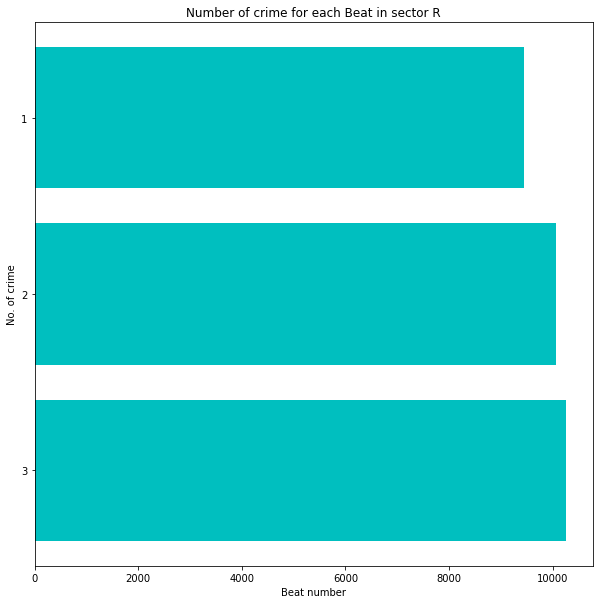

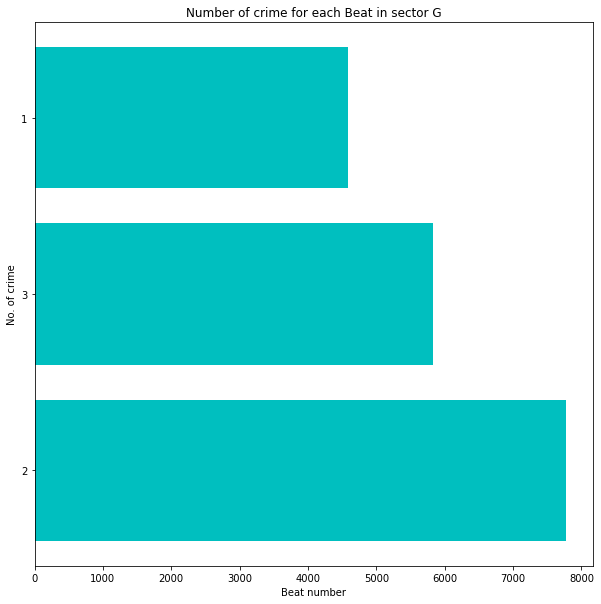

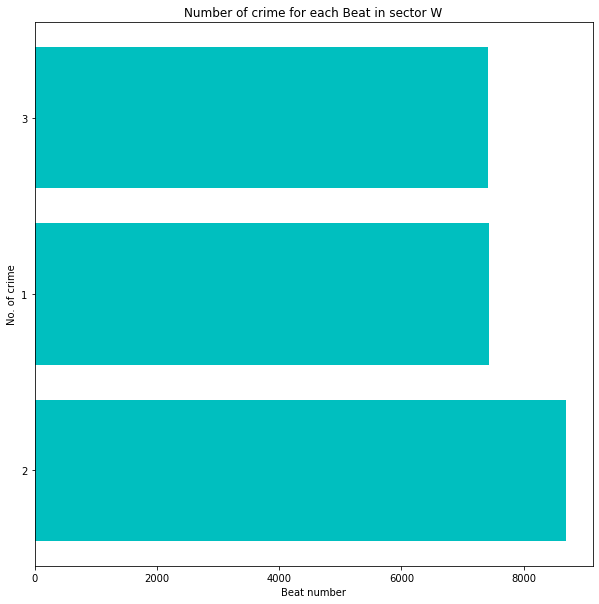

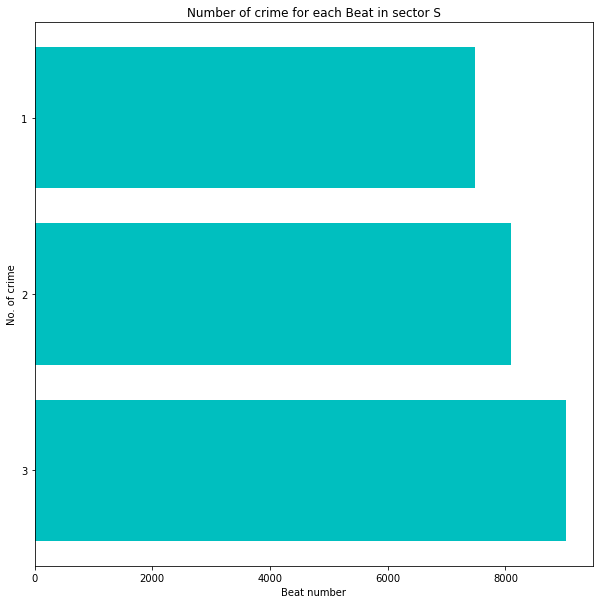

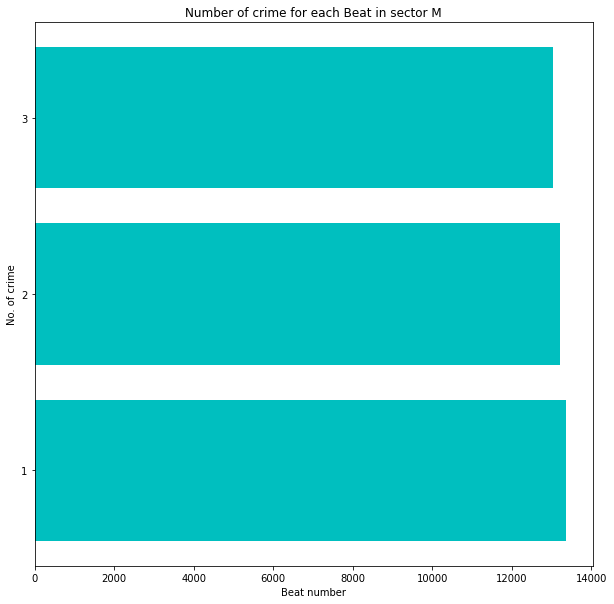

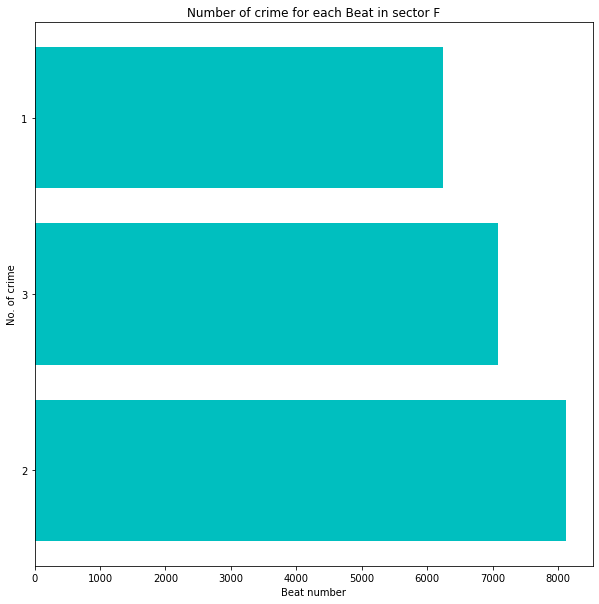

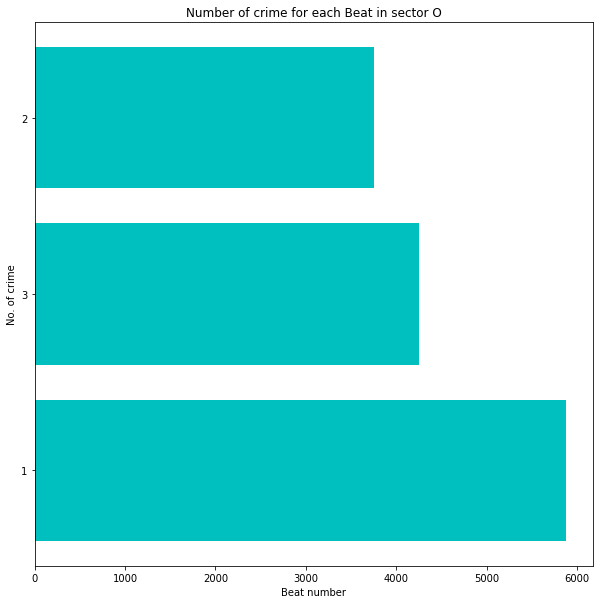

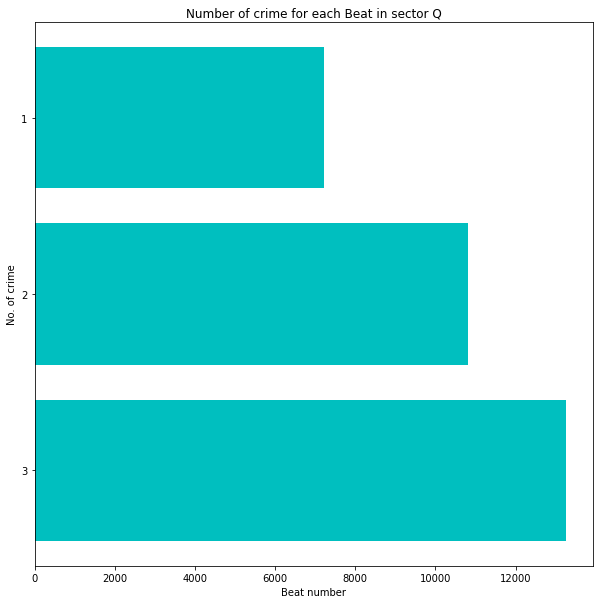

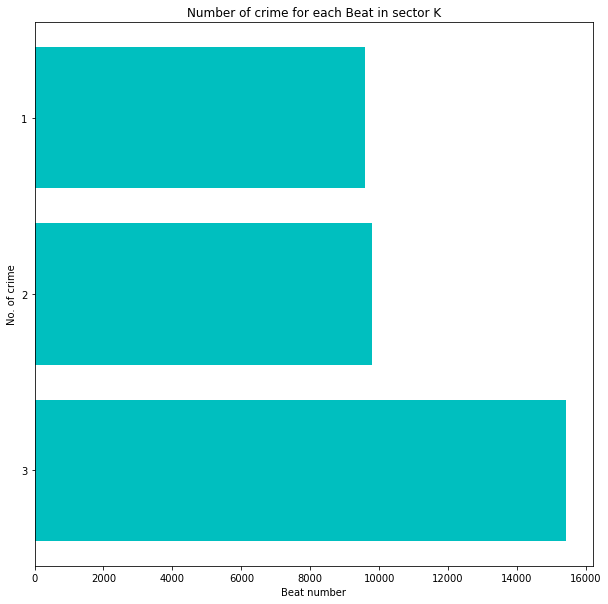

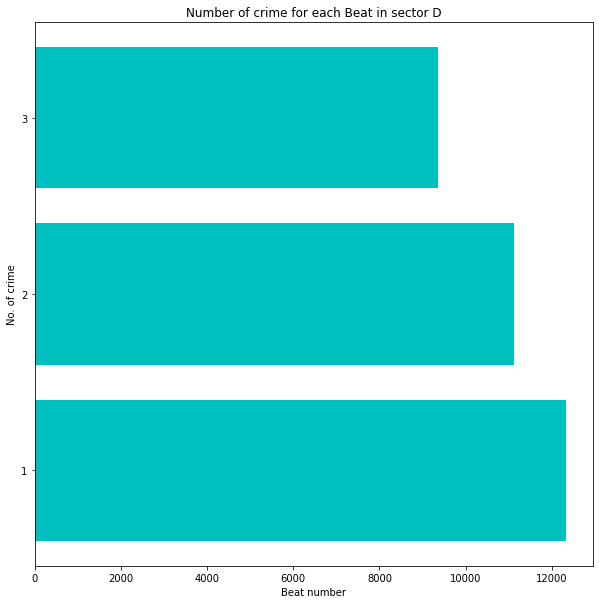

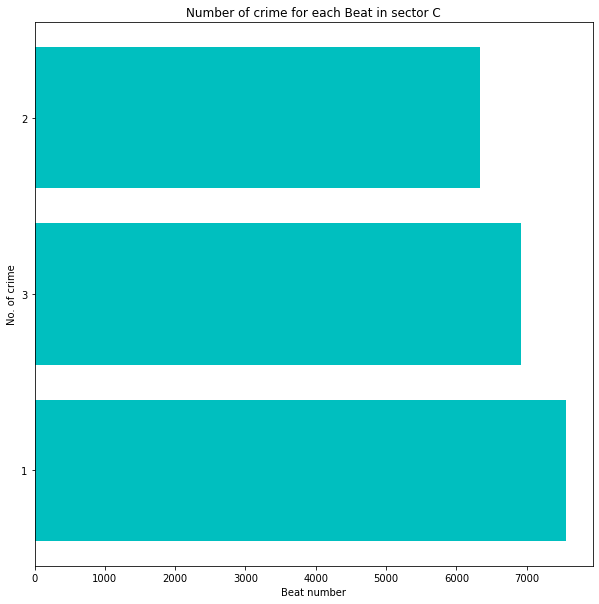

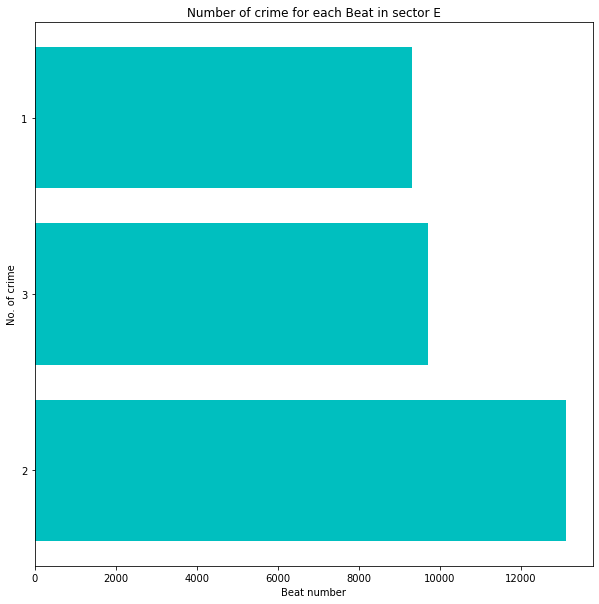

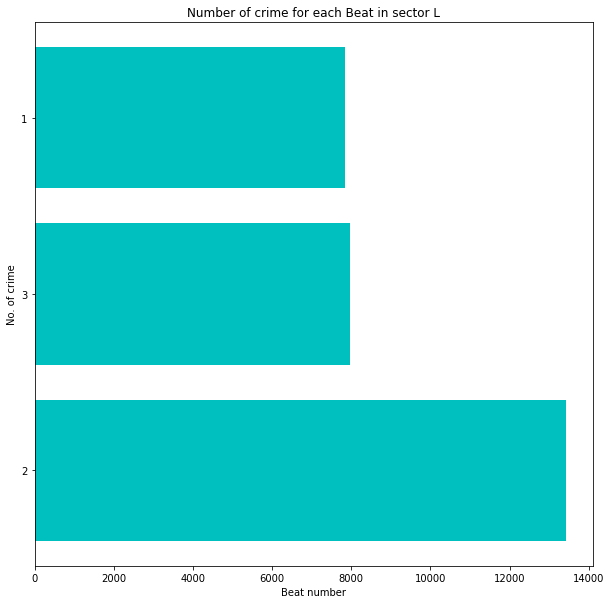

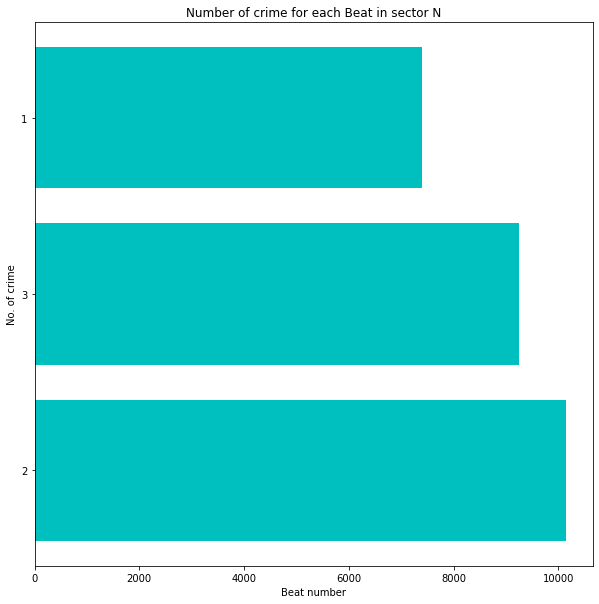

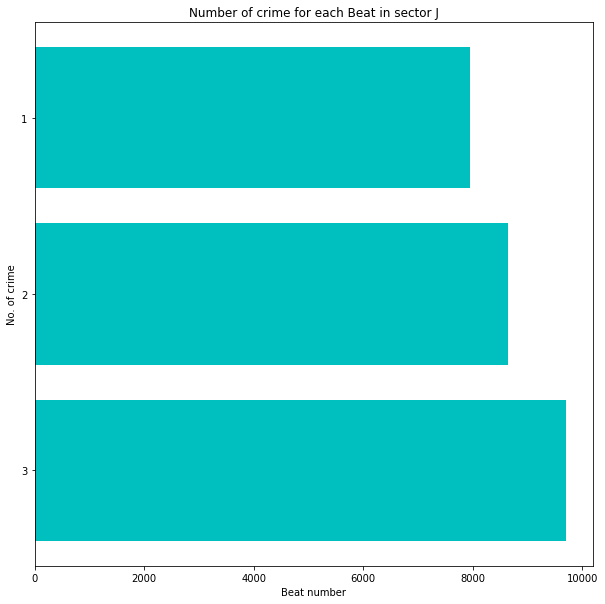

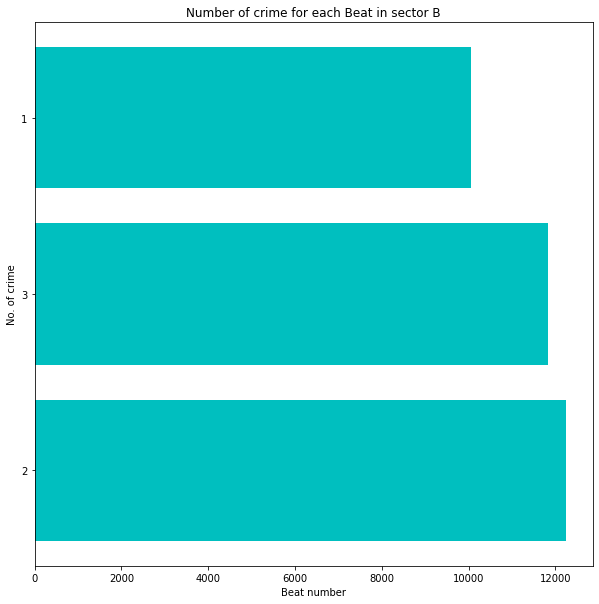

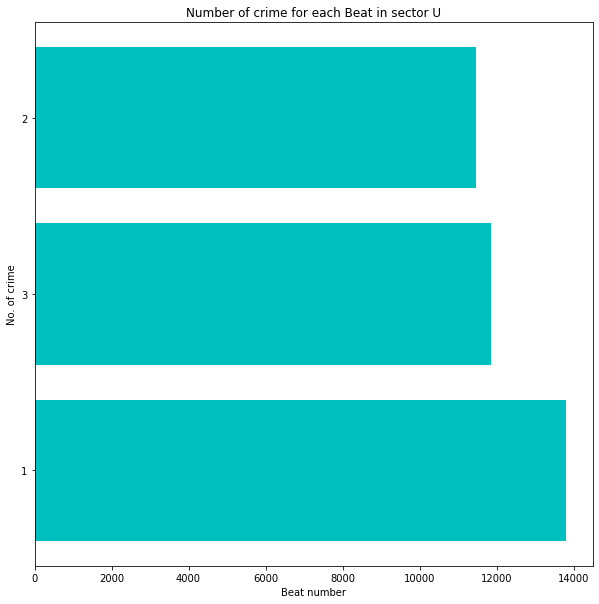

In [22]:
sec = df_new.Sector.unique()
for s in sec:
    se = df_new[df_new.Sector == s]
    beat = se.beat_number.value_counts()
    y = list(beat)
    x = beat.index

    fig = plt.figure(figsize=(10, 10))

    # creating the bar plot
    plt.barh(x, y, color='c')

    plt.xlabel("Beat number")
    plt.ylabel("No. of crime")
    plt.title("Number of crime for each Beat in sector {}".format(s))
    plt.show()